# Preprocessing

The preprocessing procces consistis in make transformations (any) in original data, before the learning proccess, in order to improve the machine learning performance.

Recording:

Polynomial Features

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures

In [3]:
X = np.arange(6).reshape(3, 2)

X

array([[0, 1],
       [2, 3],
       [4, 5]])

$$ a_0 + a_1 x + b_1 y $$

In [3]:
poly = PolynomialFeatures(2)

poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

$$ a_0 + a_1 x + b_1 y + a_2 x^2 + b_2 y^2 + c x y$$

In [4]:
poly = PolynomialFeatures(2, include_bias=False)

poly.fit_transform(X)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

## Standartization and Scaling

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
magic = fetch_openml(name='MagicTelescope', version=1)

In [6]:
magic.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [7]:
print(magic['DESCR'])

**Author**: R. K. Bock. Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)  
Donated by P. Savicky, Institute of Computer Science, AS of CR, Czech Republic  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope)  
**Please cite**: Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T., Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S., Vaicilius, A., Wittek W. (2004). 
Methods for multidimensional event classification: a case study using images from a Cherenkov gamma-ray telescope. Nucl.Instr.Meth. A, 516, pp. 511-528.  

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. Th

In [8]:
df = pd.DataFrame(magic['data'], columns = magic['feature_names'])

In [9]:
df = df.rename(columns = {col: col.replace(':', '') for col in df.columns})

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [10]:
magic['target']

array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
OrdinalEncoder?

In [20]:
y = OrdinalEncoder().fit_transform(magic['target'].reshape(-1, 1)).ravel()

y

array([0., 0., 0., ..., 1., 1., 1.])

In [21]:
subdf = df.loc[:, ['fConc', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha']].sample(1000)

In [25]:
subdf.describe()

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.374690,-3.481570,8.918016,0.046510,27.976011
std,0.182939,58.020034,51.770662,23.044657,25.789231
min,0.013100,-310.486600,-213.995000,-120.914300,0.000000
25%,0.225200,-22.853625,-13.566575,-11.508475,5.820450
50%,0.349150,2.805850,15.348250,-0.000050,18.336200
75%,0.494725,25.178650,35.909525,10.874650,45.328800
max,0.861700,364.586900,188.713700,127.685000,89.811300


In [22]:
import seaborn as sns

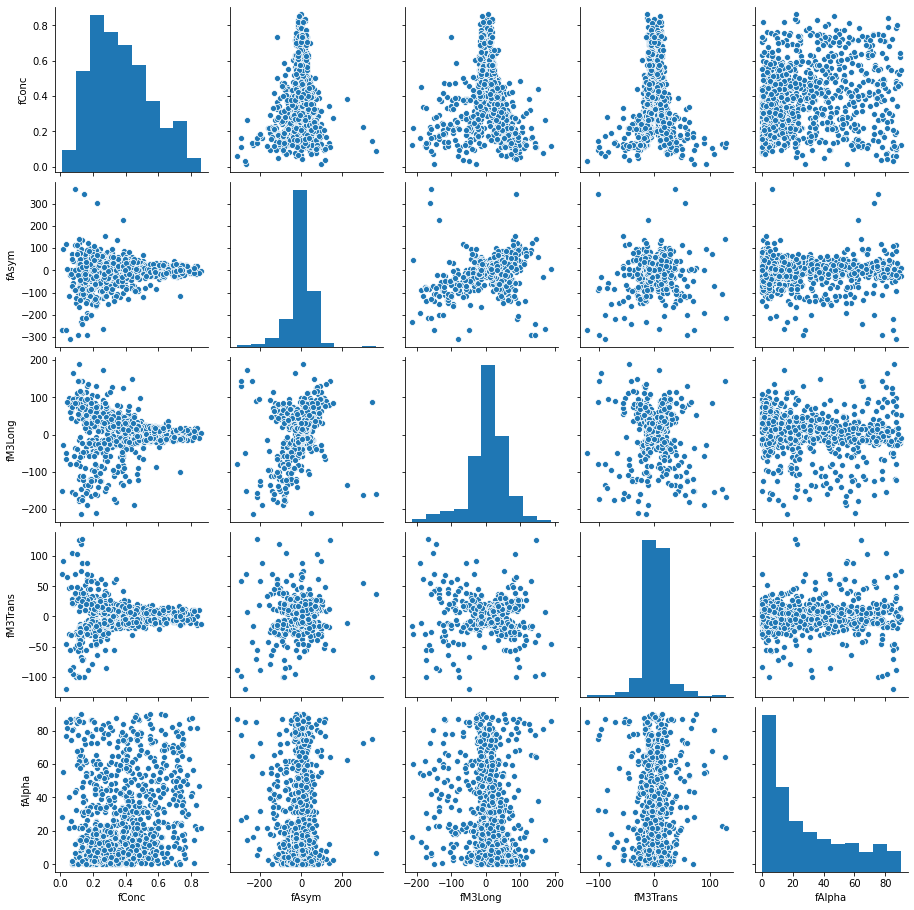

In [23]:
sns.pairplot(subdf)

In [27]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler

In [29]:
X_scaled = MinMaxScaler().fit_transform(subdf)

X_scaled

array([[0.21600283, 0.59985335, 0.79410999, 0.5553109 , 0.00732647],
       [0.55679943, 0.47800454, 0.5582745 , 0.55393479, 0.79726048],
       [0.41503653, 0.50261683, 0.61303121, 0.45526516, 0.34784042],
       ...,
       [0.8462173 , 0.46401895, 0.49926262, 0.4863823 , 0.        ],
       [0.53252416, 0.46957642, 0.56876025, 0.45051414, 0.09600128],
       [0.25076597, 0.56190681, 0.62175265, 0.55610012, 0.08402952]])

In [ ]:
sdf = pd.DataFrame(X_scaled, columns = subdf.columns)

In [30]:
sdf.describe()

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.426101,0.454773,0.553534,0.486569,0.311498
std,0.215577,0.085946,0.128556,0.092698,0.287149
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249941,0.426077,0.497701,0.440089,0.064808
50%,0.396005,0.464086,0.569502,0.486382,0.204164
75%,0.567552,0.497228,0.620559,0.530126,0.504712
max,1.000000,1.000000,1.000000,1.000000,1.000000


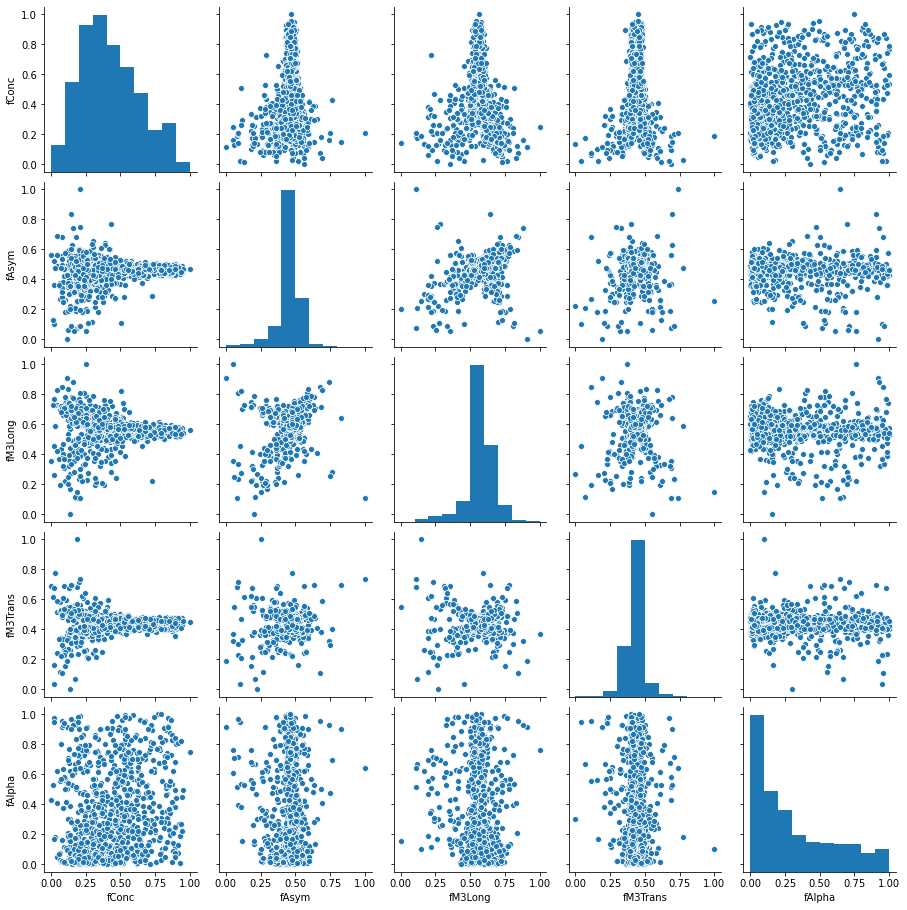

In [21]:
sns.pairplot(sdf)

In [31]:
X_scaled = MaxAbsScaler().fit_transform(subdf)

sdf = pd.DataFrame(X_scaled, columns = subdf.columns)

In [32]:
sdf.describe()

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,0.434826,-0.009549,0.041674,3.642542e-04,0.311498
std,0.212300,0.159139,0.241925,1.804805e-01,0.287149
min,0.015203,-0.851612,-1.000000,-9.469734e-01,0.000000
25%,0.261344,-0.062684,-0.063397,-9.013177e-02,0.064808
50%,0.405187,0.007696,0.071722,-3.915887e-07,0.204164
75%,0.574127,0.069061,0.167805,8.516780e-02,0.504712
max,1.000000,1.000000,0.881860,1.000000e+00,1.000000


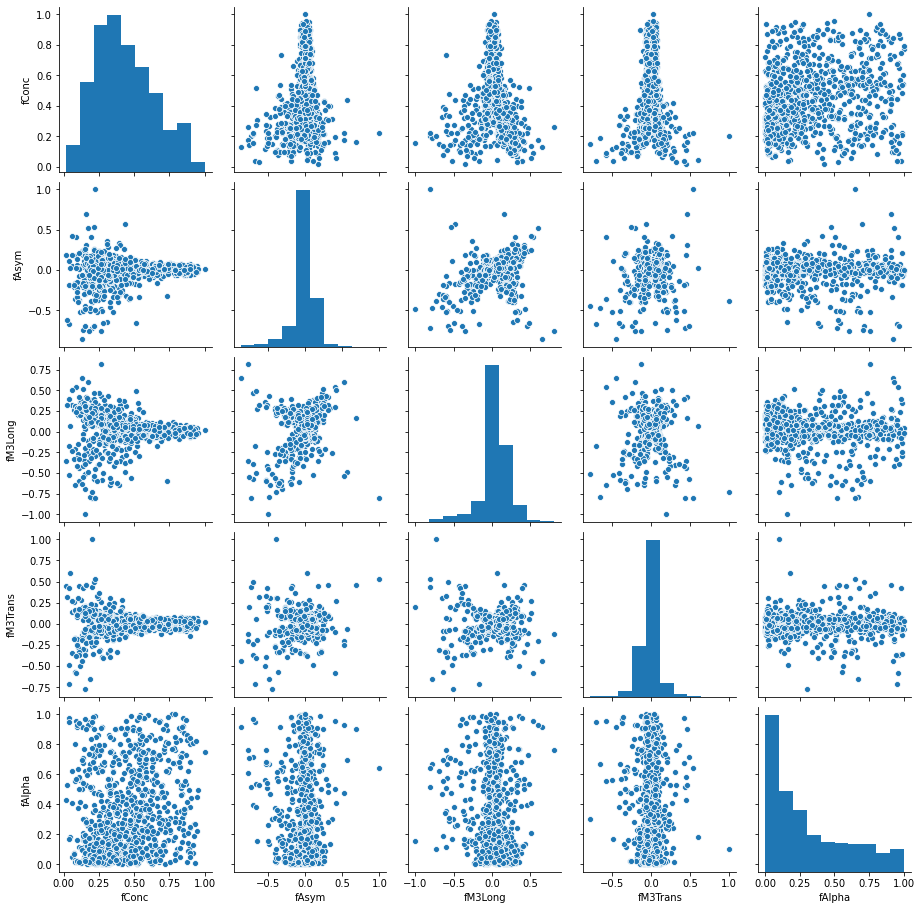

In [24]:
sns.pairplot(sdf)

In [35]:
X_scaled = StandardScaler(with_mean=True, with_std=True).fit_transform(subdf)

sdf = pd.DataFrame(X_scaled, columns=subdf.columns)

$$ z = \frac{x-\mu}{\sigma} $$

In [36]:
sdf.describe()

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-3.588241e-16,-1.776357e-18,-1.776357e-18,7.105427e-18,-9.769963e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.977553e+00,-5.294010e+00,-4.307933e+00,-5.251601e+00,-1.085337e+00
25%,-8.175665e-01,-3.340527e-01,-4.345288e-01,-5.016680e-01,-8.595311e-01
50%,-1.396774e-01,1.084206e-01,1.242683e-01,-2.021427e-03,-3.739791e-01
75%,6.564799e-01,4.942183e-01,5.216278e-01,4.701115e-01,6.732063e-01
max,2.663485e+00,6.346991e+00,3.474664e+00,5.541517e+00,2.398917e+00


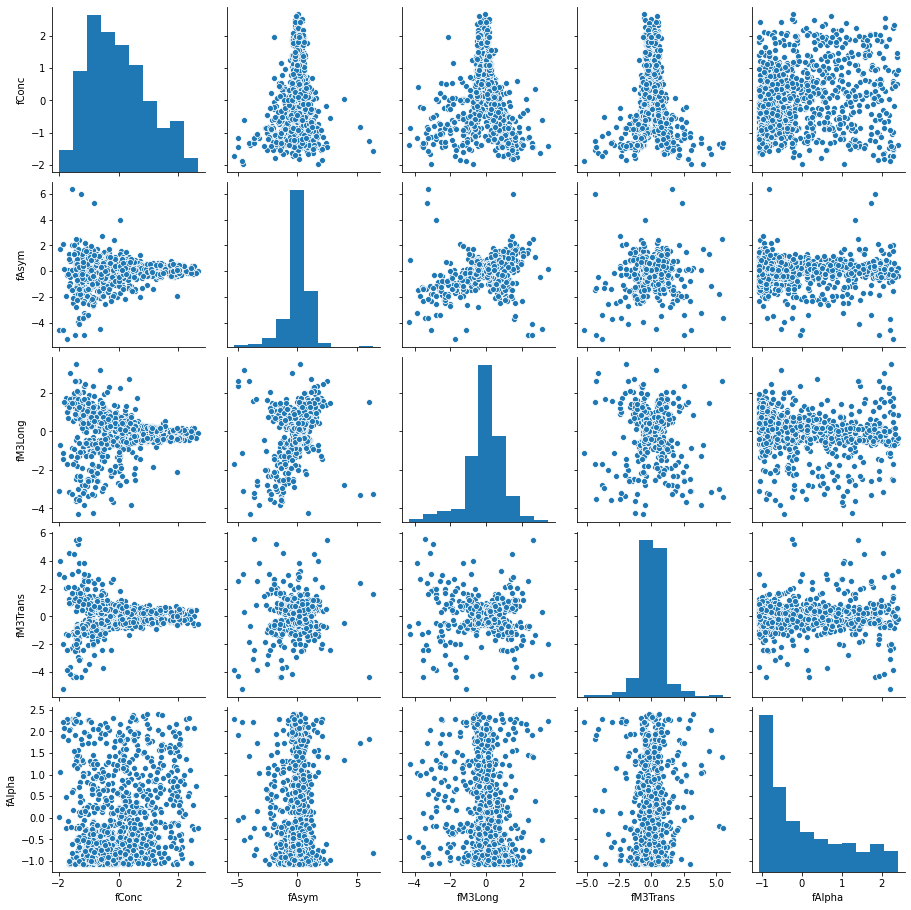

In [37]:
sns.pairplot(sdf)

In [38]:
X_scaled = RobustScaler(
    with_centering = True, with_scaling = True, quantile_range = (25.0, 75.0)
).fit_transform(subdf)

sdf = pd.DataFrame(X_scaled, columns=subdf.columns)

$$ z = \frac{x-m}{\ell} $$

In [41]:
quants = sdf.describe()

quants

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,0.094758,-0.130900,-0.129966,0.002080,2.439943e-01
std,0.678744,1.207938,1.046377,1.029555,6.527539e-01
min,-1.246823,-6.522540,-4.635435,-5.402027,-4.641095e-01
25%,-0.459883,-0.534213,-0.584420,-0.514156,-3.167875e-01
50%,0.000000,0.000000,0.000000,0.000000,4.499439e-17
75%,0.540117,0.465787,0.415580,0.485844,6.832125e-01
max,1.901679,7.532041,3.504024,5.704523,1.809114e+00


In [44]:
quants.loc['75%'] - quants.loc['25%']

fConc       1.0
fAsym       1.0
fM3Long     1.0
fM3Trans    1.0
fAlpha      1.0
dtype: float64

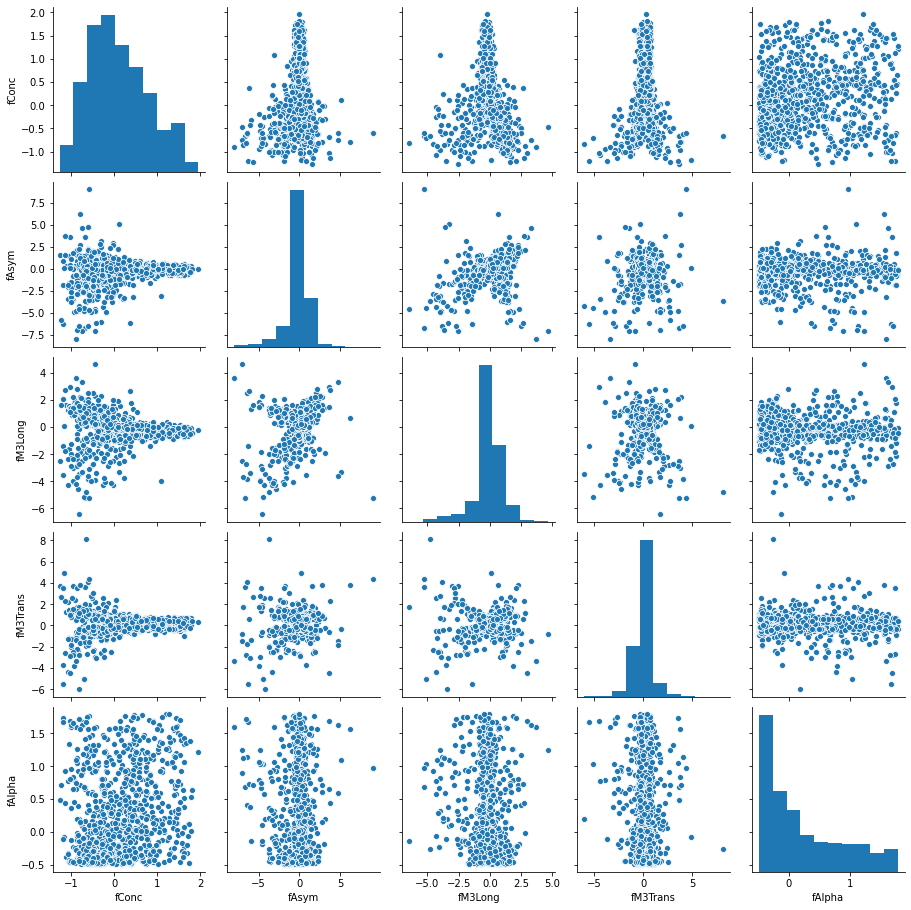

In [30]:
sns.pairplot(sdf)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, stratify = y)

In [51]:
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier

In [52]:
models = {
    'NoScalar': KNeighborsClassifier(),
    
    'MinMaxScalar': make_pipeline(
        MinMaxScaler(),
        KNeighborsClassifier()
    ),
    'MaxAbsScalar': make_pipeline(
        MaxAbsScaler(),
        KNeighborsClassifier()
    ),
    'StandardScalar': make_pipeline(
        StandardScaler(),
        KNeighborsClassifier()
    ),
    'RobustScalar': make_pipeline(
        RobustScaler(),
        KNeighborsClassifier()
    )
}

In [64]:
1/1e-1000

ZeroDivisionError: float division by zero

In [53]:
scores = {}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    scores[name] = model.score(X_test, y_test)

In [54]:
for name, score in scores.items():
    
    print(name, ':', np.round(score, 3))

NoScalar : 0.814
MinMaxScalar : 0.832
MaxAbsScalar : 0.823
StandardScalar : 0.835
RobustScalar : 0.848


In [55]:
reference = scores['NoScalar']

In [56]:
for name, score in scores.items():
    
    d = 100 * (score - reference) / reference
    
    print(name, ':', np.round(d, 1), '%')

NoScalar : 0.0 %
MinMaxScalar : 2.3 %
MaxAbsScalar : 1.1 %
StandardScalar : 2.6 %
RobustScalar : 4.2 %


## Non-linear transformations

In [65]:
from sklearn.preprocessing import QuantileTransformer

In [66]:
X_scaled = QuantileTransformer(output_distribution='uniform').fit_transform(subdf)

sdf = pd.DataFrame(X_scaled, columns=subdf.columns)

In [67]:
sdf.describe()

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000
std,0.289108,0.289109,0.289109,0.289109,0.289109
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249750,0.250000,0.250000,0.250000,0.250000
50%,0.500000,0.500000,0.500000,0.500501,0.500000
75%,0.750000,0.750000,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


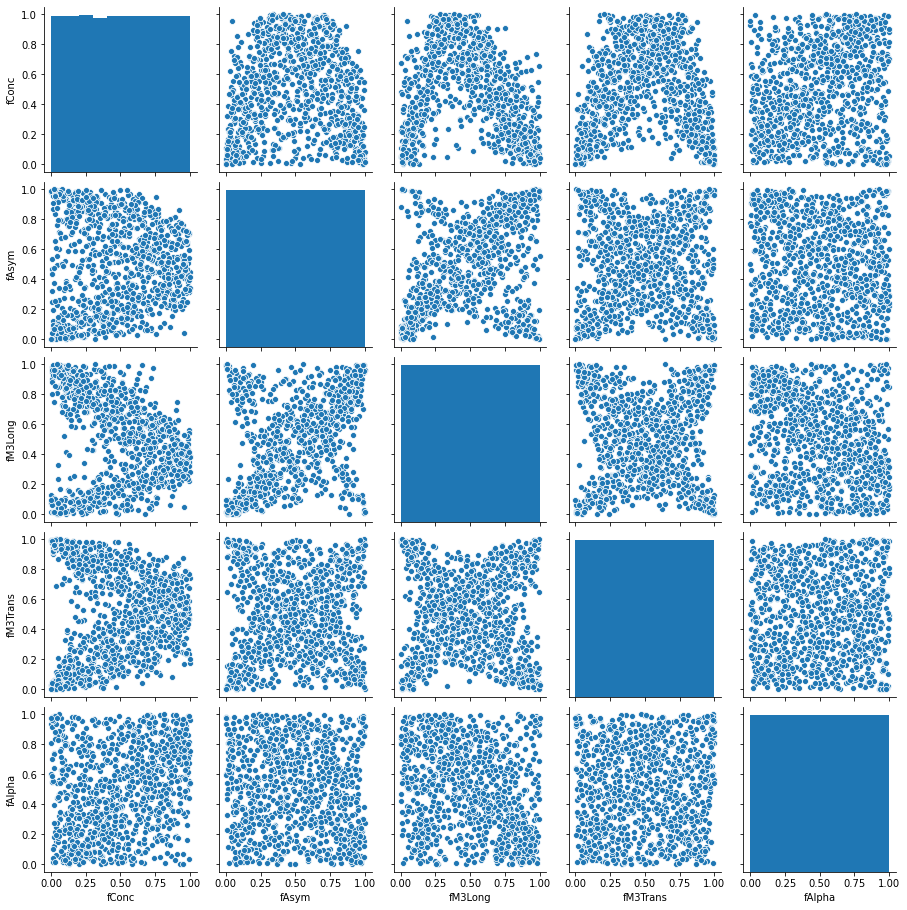

In [68]:
sns.pairplot(sdf)

In [69]:
X_scaled = QuantileTransformer(output_distribution='normal').fit_transform(subdf)

sdf = pd.DataFrame(X_scaled, columns=subdf.columns)

In [70]:
sdf.describe()

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.338485e-05,-3.837350e-10,-8.053705e-10,-3.798251e-09,2.228236e-08
std,1.020373e+00,1.020366e+00,1.020366e+00,1.020366e+00,1.020366e+00
min,-5.199338e+00,-5.199338e+00,-5.199338e+00,-5.199338e+00,-5.199338e+00
25%,-6.752775e-01,-6.744904e-01,-6.744904e-01,-6.744904e-01,-6.744904e-01
50%,6.960578e-17,6.960578e-17,6.960578e-17,1.254573e-03,6.960578e-17
75%,6.744904e-01,6.744904e-01,6.744904e-01,6.744904e-01,6.744904e-01
max,5.199338e+00,5.199338e+00,5.199338e+00,5.199338e+00,5.199338e+00


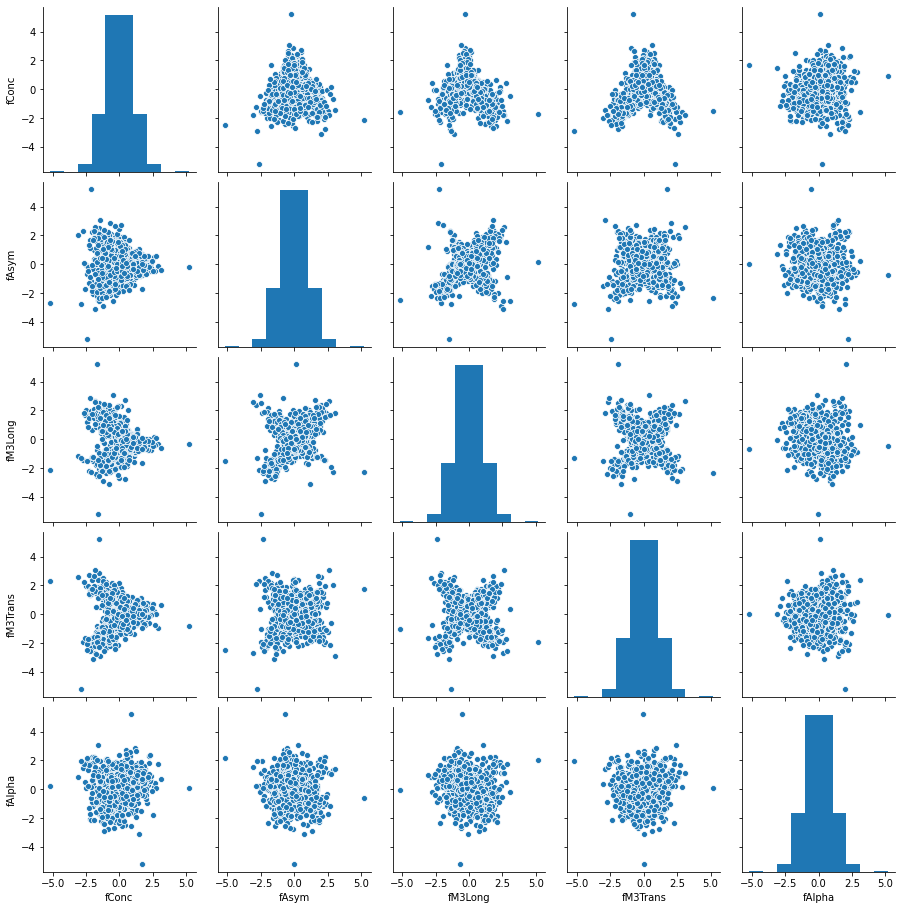

In [71]:
sns.pairplot(sdf)

In [73]:
# other ways to transform to a normal distribution
from sklearn.preprocessing import PowerTransformer # Same as Normalizer

In [74]:
X_scaled = PowerTransformer(method='yeo-johnson', standardize=True).fit_transform(subdf)
# The Box-Cox transformation can only be applied to strictly positive data

sdf = pd.DataFrame(X_scaled, columns=subdf.columns)

In [75]:
sdf.describe()

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-3.694822e-16,1.243450e-17,1.065814e-17,1.421085e-17,9.414691e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.565821e+00,-4.398019e+00,-3.307591e+00,-5.409848e+00,-1.996000e+00
25%,-8.013778e-01,-4.003004e-01,-5.640713e-01,-4.957788e-01,-8.532662e-01
50%,-1.804558e-02,1.175797e-02,-1.061906e-03,1.134797e-02,-6.899354e-03
75%,7.420725e-01,4.583147e-01,4.942690e-01,4.771152e-01,8.630898e-01
max,2.148312e+00,8.101892e+00,4.565144e+00,5.382185e+00,1.652861e+00


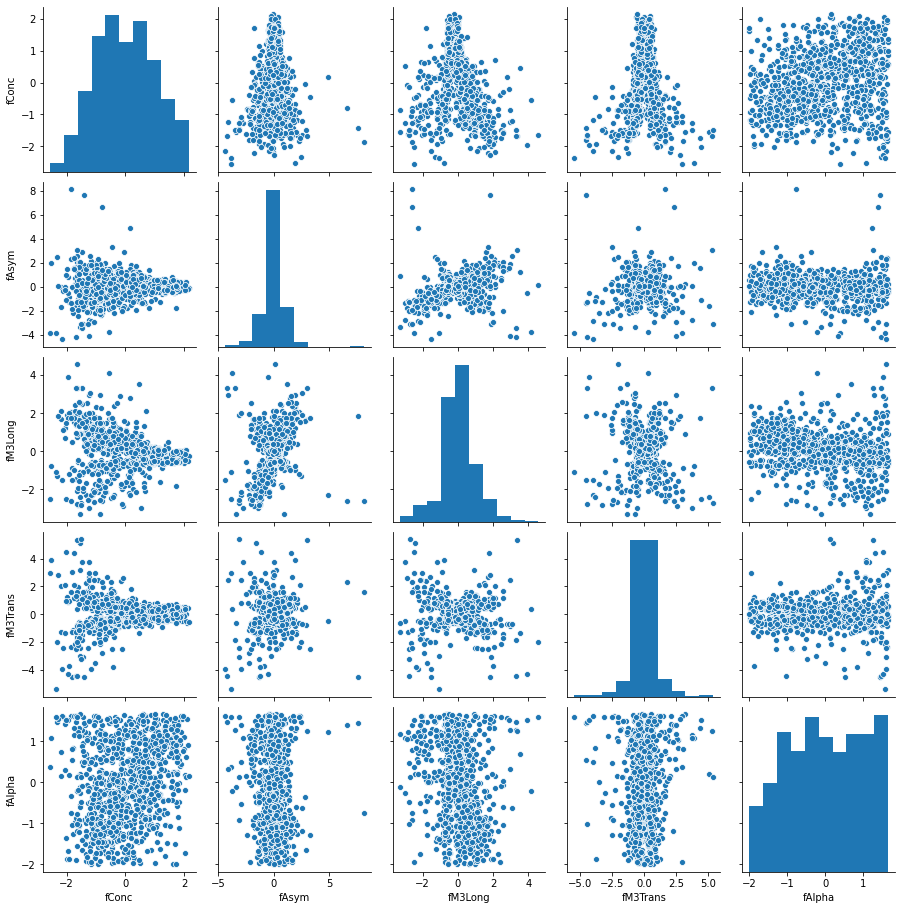

In [76]:
sns.pairplot(sdf)

In [77]:
models = {    
    'UniformQuantile': make_pipeline(
        QuantileTransformer(),
        KNeighborsClassifier()
    ),
    'NormalQuantile': make_pipeline(
        QuantileTransformer(output_distribution='normal'),
        KNeighborsClassifier()
    ),
    'YeoJohnson': make_pipeline(
        PowerTransformer(),
        KNeighborsClassifier()
    )
}

In [78]:
for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    scores[name] = model.score(X_test, y_test)

In [79]:
for name, score in scores.items():
    
    print(name, ':', np.round(score, 3))

NoScalar : 0.814
MinMaxScalar : 0.832
MaxAbsScalar : 0.823
StandardScalar : 0.835
RobustScalar : 0.848
UniformQuantile : 0.855
NormalQuantile : 0.852
YeoJohnson : 0.866


In [80]:
for name, score in scores.items():
    
    d = 100 * (score - reference) / reference
    
    print(name, ':', np.round(d, 1), '%')

NoScalar : 0.0 %
MinMaxScalar : 2.3 %
MaxAbsScalar : 1.1 %
StandardScalar : 2.6 %
RobustScalar : 4.2 %
UniformQuantile : 5.0 %
NormalQuantile : 4.7 %
YeoJohnson : 6.5 %


## Discretization

In [81]:
from sklearn.preprocessing import KBinsDiscretizer

In [82]:
X_disc = KBinsDiscretizer(encode = 'ordinal').fit_transform(subdf)
sdf = pd.DataFrame(X_disc, columns = subdf.columns)

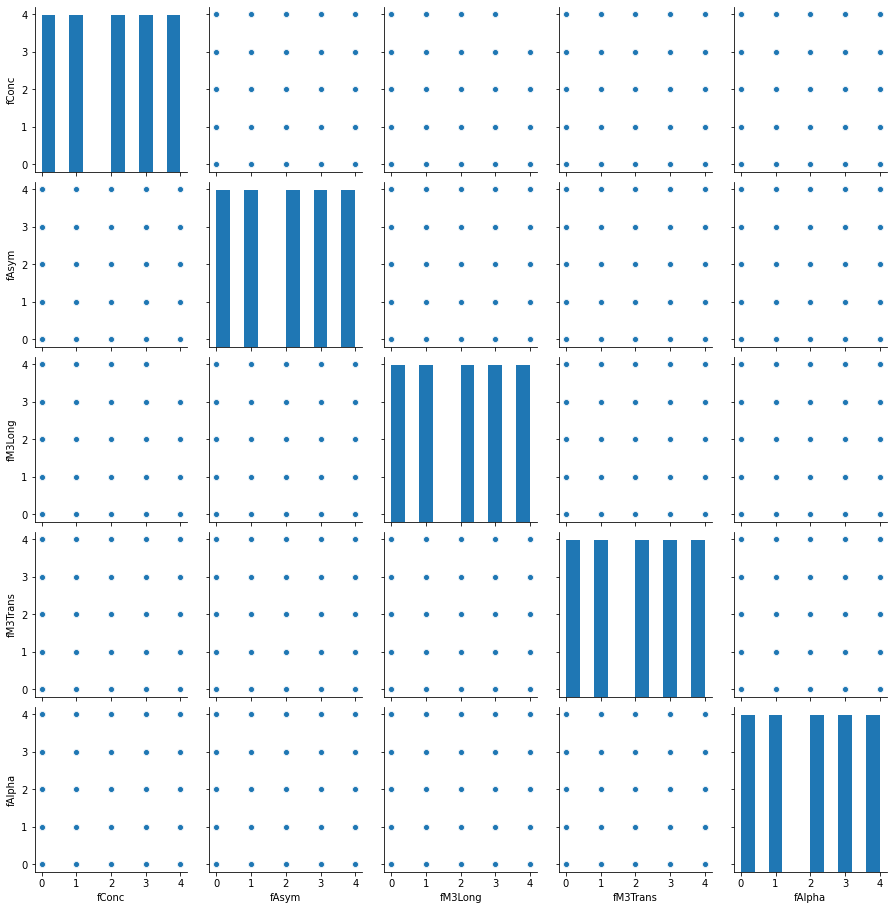

In [83]:
sns.pairplot(sdf)

In [84]:
X_disc = KBinsDiscretizer(n_bins = [20, 30, 50, 40, 30], encode = 'ordinal').fit_transform(subdf)
sdf = pd.DataFrame(X_disc, columns = subdf.columns)

X_disc

array([[ 3., 29., 49., 34.,  0.],
       [14., 18., 21., 34., 26.],
       [10., 23., 36., 14., 18.],
       ...,
       [19., 14., 12., 20.,  0.],
       [13., 16., 24., 13.,  9.],
       [ 5., 28., 37., 35.,  8.]])

In [85]:
sdf.describe()

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.504000,14.501000,24.500000,19.500000,14.501000
std,5.767603,8.667591,14.438091,11.549172,8.667591
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,7.000000,12.000000,9.750000,7.000000
50%,9.500000,14.500000,24.500000,19.500000,14.500000
75%,14.250000,22.000000,37.000000,29.250000,22.000000
max,19.000000,29.000000,49.000000,39.000000,29.000000


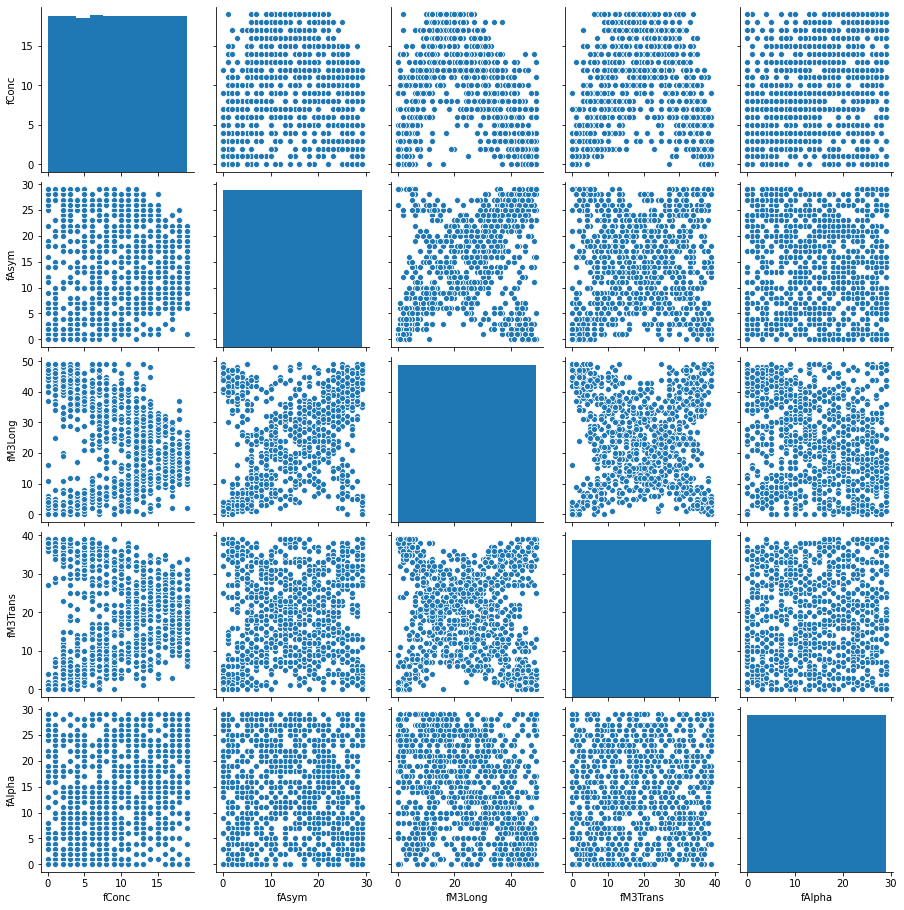

In [86]:
sns.pairplot(sdf)

In [87]:
model = make_pipeline(
    KBinsDiscretizer(n_bins = [50] * X_train.shape[-1], encode = 'ordinal'),
    KNeighborsClassifier()
)

In [88]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kbinsdiscretizer',
                 KBinsDiscretizer(encode='ordinal',
                                  n_bins=[50, 50, 50, 50, 50, 50, 50, 50, 50,
                                          50],
                                  strategy='quantile')),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [89]:
scores['Discretization'] = model.score(X_train, y_train)

In [90]:
for name, score in scores.items():
    
    print(name, ':', np.round(score, 3))

NoScalar : 0.814
MinMaxScalar : 0.832
MaxAbsScalar : 0.823
StandardScalar : 0.835
RobustScalar : 0.848
UniformQuantile : 0.855
NormalQuantile : 0.852
YeoJohnson : 0.866
Discretization : 0.886


In [91]:
for name, score in scores.items():
    
    d = 100 * (score - reference) / reference
    
    print(name, ':', np.round(d, 1), '%')

NoScalar : 0.0 %
MinMaxScalar : 2.3 %
MaxAbsScalar : 1.1 %
StandardScalar : 2.6 %
RobustScalar : 4.2 %
UniformQuantile : 5.0 %
NormalQuantile : 4.7 %
YeoJohnson : 6.5 %
Discretization : 8.8 %


In [92]:
model = make_pipeline(
    StandardScaler(),
    KBinsDiscretizer(n_bins = [50] * X_train.shape[-1], encode = 'ordinal'),
    KNeighborsClassifier()
)

In [93]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kbinsdiscretizer',
                 KBinsDiscretizer(encode='ordinal',
                                  n_bins=[50, 50, 50, 50, 50, 50, 50, 50, 50,
                                          50],
                                  strategy='quantile')),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [94]:
model.score(X_train, y_train)

0.8857927327958873

In [95]:
(_ - reference)/ reference

0.08835773758254367

In [96]:
from sklearn.preprocessing import FunctionTransformer

In [99]:
np.log1p?

In [100]:
transformer = FunctionTransformer(np.exp)

In [101]:
transformer.fit_transform(subdf)

,fConc,fAsym,fM3Long,fM3Trans,fAlpha
4437,1.217014,1.053914e+41,8.878839e+45,2.766282e+07,1.930927e+00
2736,1.625150,1.991075e+05,5.036239e+04,1.964827e+07,1.249648e+31
14205,1.440946,3.272908e+12,1.899914e+14,4.369464e-04,3.692833e+13
10080,1.372728,5.470582e-01,1.786609e+08,3.987005e-04,6.162543e+06
9365,2.046846,5.218393e+06,5.402384e-04,6.442777e+04,2.954332e+25
...,...,...,...,...,...
8492,1.481270,8.049300e-01,6.910858e+13,7.029779e-03,2.007870e+05
9009,1.173980,2.725736e+16,4.983478e+22,7.234533e-09,1.788522e+06
285,2.077572,1.580458e+01,2.405868e-06,1.000000e+00,1.000000e+00
6682,1.592014,6.731714e+02,3.435593e+06,1.341167e-04,5.552480e+03
